# Experiment No. 8

### Name: Vivek Vitthal Avhad (4031)

In [14]:
# -----------------------------
# Importing Required Libraries
# -----------------------------
import kagglehub
karthickveerakumar_spam_filter_path = kagglehub.dataset_download('karthickveerakumar/spam-filter')
print('Data source import complete.')

import numpy as np           # For numerical computations
import pandas as pd          # For data processing (CSV, etc.)
import seaborn as sns        # For visualization
import matplotlib.pyplot as plt  # For plotting
import os

import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import MultinomialNB


Data source import complete.


In [8]:
# -----------------------------
# Checking Dataset Files
# -----------------------------
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


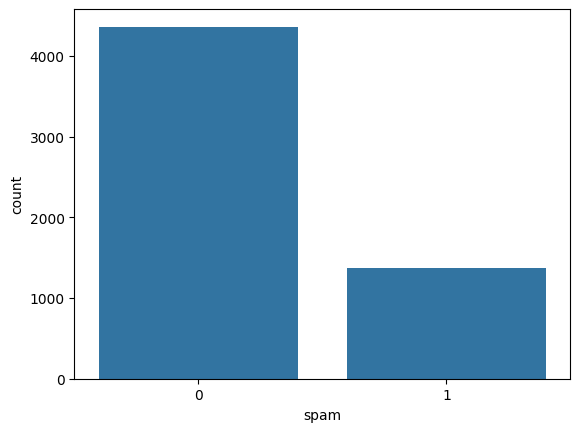

In [9]:
"""Loading and Observing the Dataset"""
df = pd.read_csv(os.path.join(karthickveerakumar_spam_filter_path, 'emails.csv'))

# Display first few rows
df.head()

# Dataset shape
df.shape

# Dataset info
df.info()

"""No Missing Values"""
df.isna().sum()

"""**Exploratory Data Analysis**"""
# Count of spam vs non-spam
df['spam'].value_counts()

# Plot spam distribution
sns.countplot(x=df['spam'])

"""Checking the Length of Emails and Its Relation"""
from nltk import word_tokenize

"""Function that tokenizes each email into words and returns its length"""
def count_words(text):
    words = word_tokenize(text)
    return len(words)


In [10]:
# Download punkt tokenizer (required for word_tokenize)
nltk.download('punkt')  # Corrected from 'punkt_tab' which is invalid

# Apply the count_words function to compute word count for each email
df['count'] = df['text'].apply(count_words)
"""Applying the function to df['text'] and storing the count in another column"""

# Display the word counts
df['count']

# Average word count grouped by spam label
df.groupby('spam')['count'].mean()

"""# Text Preprocessing
Function to process the text data and:
1. Remove punctuation
2. Remove stop words
3. Apply stemming
"""


[nltk_data] Downloading package punkt to /home/bablu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


'# Text Preprocessing\nFunction to process the text data and:\n1. Remove punctuation\n2. Remove stop words\n3. Apply stemming\n'

In [ ]:
# Download stopwords
nltk.download('stopwords')

# -----------------------------
# Text Cleaning Function
# -----------------------------
def process_text(text):
    # Remove punctuation
    no_punc = [char for char in text if char not in string.punctuation]
    no_punc = ''.join(no_punc)
    # Remove stopwords
    return ' '.join([word for word in no_punc.split() if word.lower() not in stopwords.words('english')])

# Apply text cleaning
df['text'] = df['text'].apply(process_text)
df['text']

"""**After cleaning the text, we will now carry out the process of stemming
to reduce words to their root form**"""

# -----------------------------
# Stemming Function
# -----------------------------
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def stemming(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])

# Apply stemming
df['text'] = df['text'].apply(stemming)
df.head()


[nltk_data] Downloading package stopwords to /home/bablu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,spam,count
0,subject natur irresist corpor ident lt realli ...,1,325
1,subject stock trade gunsling fanni merril muzo...,1,90
2,subject unbeliev new home made easi im want sh...,1,88
3,subject 4 color print special request addit in...,1,99
4,subject money get softwar cd softwar compat gr...,1,53


In [12]:
"""**Now we will use CountVectorizer to convert string data into Bag of Words (BoW) ie known vocabulary**"""

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Transform text data into Bag of Words
message_bow = vectorizer.fit_transform(df['text'])

# Optional: check vocabulary and array representation
# print(vectorizer.get_feature_names_out())
# print(message_bow.toarray())

"""**Splitting the Data**"""
from sklearn.model_selection import train_test_split

# Split dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(message_bow, df['spam'], test_size=0.20, random_state=42)

"""# Creating the Model and its Evaluation"""
from sklearn.naive_bayes import MultinomialNB

# Initialize Multinomial Naive Bayes
nb = MultinomialNB()

# Train the model
nb.fit(X_train, y_train)

# Predict on test set
y_pred = nb.predict(X_test)


              precision    recall  f1-score   support

           0       1.00      0.99      0.99       856
           1       0.97      0.99      0.98       290

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146

Accuracy using Cross Validation is: 98.91762500285786 %
The email is classified as: Not Spam


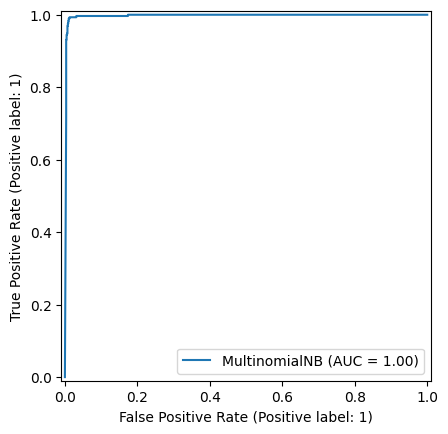

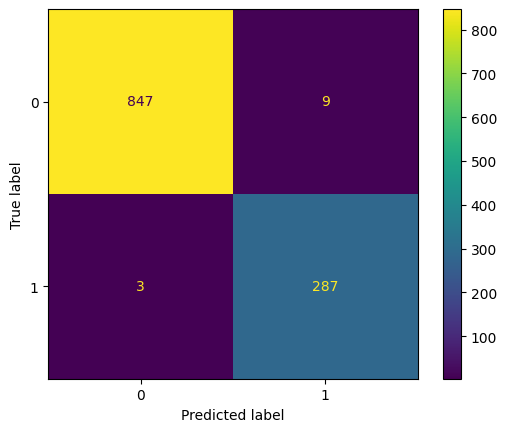

In [ ]:
# -----------------------------
# Classification Report
# -----------------------------
print(classification_report(y_test, y_pred))

# -----------------------------
# ROC Curve
# -----------------------------
RocCurveDisplay.from_estimator(nb, X_test, y_test)

# -----------------------------
# Confusion Matrix
# -----------------------------
ConfusionMatrixDisplay.from_estimator(nb, X_test, y_test)

# -----------------------------
# Cross-Validation Accuracy
# -----------------------------
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
accuracy_cv = np.mean(cross_val_score(nb, message_bow, df['spam'], cv=kfold, scoring="accuracy")) * 100
print("Accuracy using Cross Validation is:", accuracy_cv, "%")

# -----------------------------
# Function to Predict Spam or Not
# -----------------------------
def predict_spam(email_text):
    # Transform the input email text using the trained vectorizer
    email_features = vectorizer.transform([email_text])
    # Predict using the trained model
    prediction = nb.predict(email_features)
    # Return result as string
    return "Spam" if prediction[0] == 1 else "Not Spam"

# -----------------------------
# Example Test
# -----------------------------
new_email = "Congratulations! You won a free lottery ticket. Call now!"
result = predict_spam(new_email)
print(f"The email is classified as: {result}")


## Student Activity:
1. SMS filtering

In [15]:
# -----------------------------
# SMS Spam Filtering Pipeline
# -----------------------------
# -----------------------------
# Download NLTK Resources
# -----------------------------
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/bablu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/bablu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
# -----------------------------
# Load SMS Spam Dataset
# -----------------------------
# Example: 'spam.csv' with columns ['label', 'text']
df = pd.read_csv('spam.csv', encoding='latin-1')[['v1','v2']]
df.columns = ['spam', 'text']
df['spam'] = df['spam'].map({'ham': 0, 'spam': 1})  # Convert labels to 0/1

In [18]:
# -----------------------------
# Text Cleaning Function
# -----------------------------
def process_text(text):
    no_punc = ''.join([char for char in text if char not in string.punctuation])
    return ' '.join([word for word in no_punc.split() if word.lower() not in stopwords.words('english')])

df['text'] = df['text'].apply(process_text)


In [19]:

# -----------------------------
# Stemming Function
# -----------------------------
stemmer = PorterStemmer()
def stemming(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])

df['text'] = df['text'].apply(stemming)


In [20]:
# -----------------------------
# Convert Text to Bag of Words
# -----------------------------
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['text'])
y = df['spam']


In [21]:
# -----------------------------
# Split Data
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# -----------------------------
# Train Naive Bayes Model
# -----------------------------
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.91      0.92      0.92       150

    accuracy                           0.98      1115
   macro avg       0.95      0.95      0.95      1115
weighted avg       0.98      0.98      0.98      1115



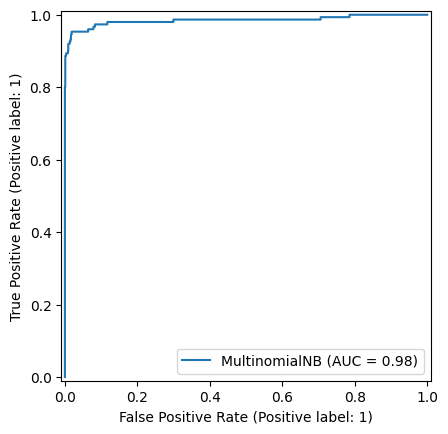

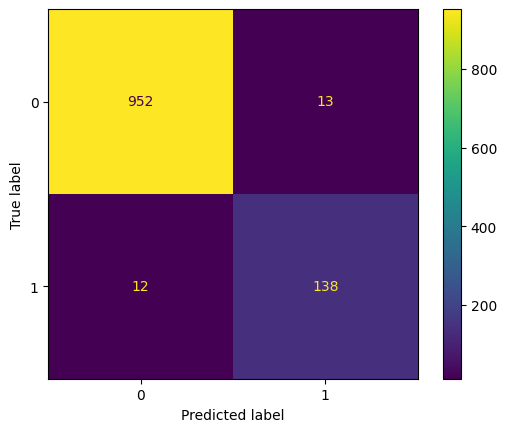

In [23]:
# -----------------------------
# Evaluate Model
# -----------------------------
print("Classification Report:\n", classification_report(y_test, y_pred))
RocCurveDisplay.from_estimator(nb, X_test, y_test)
ConfusionMatrixDisplay.from_estimator(nb, X_test, y_test)

In [24]:
# Cross-Validation Accuracy
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
accuracy_cv = np.mean(cross_val_score(nb, X, y, cv=kfold, scoring="accuracy")) * 100
print("Cross-Validation Accuracy:", accuracy_cv, "%")

Cross-Validation Accuracy: 97.64888777966524 %


In [25]:
# -----------------------------
# Function to Predict SMS Spam
# -----------------------------
def predict_sms(text):
    processed = stemming(process_text(text))
    features = vectorizer.transform([processed])
    return "Spam" if nb.predict(features)[0] == 1 else "Not Spam"


In [26]:
# -----------------------------
# Example Prediction
# -----------------------------
sms_example = "Free entry in 2 a weekly competition! Text WIN to 12345"
result = predict_sms(sms_example)
print(f"The SMS is classified as: {result}")

The SMS is classified as: Spam
